In [1]:
import pandas as pd

df = pd.read_csv("../data/processed/roi_optimized_retention.csv")
df.head()


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment,Cluster,PCA1,PCA2,Churn,Churn_Probability,Churn_Risk,Retention_Action,Expected_Revenue,Retention_Cost,ROI,Final_Action
0,12346.0,326,1,77183.60,1,1,5,115,Lost Customers,3,4.106623,5.433579,1,0.950000,High Risk,Re-engagement campaign,3859.180000,10,3849.180000,Re-engagement campaign
1,12347.0,2,7,4310.00,5,5,5,555,Champions,0,0.742411,-0.671300,0,NaN,Low Risk,No immediate action,NaN,0,NaN,No Action
2,12348.0,75,4,1797.24,2,4,4,244,At Risk,0,0.024802,-0.174954,0,0.001117,Low Risk,No immediate action,1795.232824,0,1795.232824,No Action
3,12349.0,19,1,1757.55,4,1,4,414,Potential Loyalists,0,-0.028036,-0.735124,0,NaN,Low Risk,Personalized email campaign,NaN,5,NaN,No Action
4,12350.0,310,1,334.40,1,1,2,112,Lost Customers,1,-1.235466,1.834946,1,NaN,Low Risk,Re-engagement campaign,NaN,10,NaN,No Action


In [2]:
df["CustomerID"].nunique()


4338

In [3]:
df["Churn"].value_counts(normalize=True)


Churn
0    0.665975
1    0.334025
Name: proportion, dtype: float64

Revenue Concentration Analysis

In [4]:
df.groupby("Segment")["Monetary"].sum().sort_values(ascending=False)


Segment
Champions              5809341.070
Loyal Customers        1474127.551
At Risk                 800531.551
Others                  365077.171
Lost Customers          316163.991
Potential Loyalists     146166.570
Name: Monetary, dtype: float64

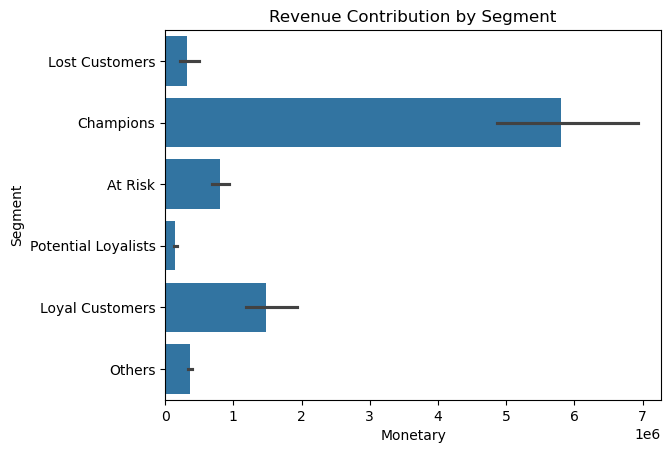

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    x="Monetary",
    y="Segment",
    data=df,
    estimator=sum
)

plt.title("Revenue Contribution by Segment")
plt.show()


In [6]:
pd.crosstab(df["Segment"], df["Churn_Risk"], normalize="index")


Churn_Risk,High Risk,Low Risk
Segment,,
At Risk,0.197512,0.802488
Champions,0.000000,1.000000
Lost Customers,0.251506,0.748494
Loyal Customers,0.000000,1.000000
Others,0.090426,0.909574
Potential Loyalists,0.000000,1.000000


In [7]:
df["ROI"].sum()


np.float64(2187584.9324420756)

In [8]:
df.groupby("Final_Action")["ROI"].sum().sort_values(ascending=False)


Final_Action
No Action                 2.181115e+06
Re-engagement campaign    3.849180e+03
Discount coupon           2.482484e+03
No immediate action       1.380373e+02
Name: ROI, dtype: float64

In [9]:
priority_customers = df[
    (df["Churn_Risk"] == "High Risk") &
    (df["ROI"] > 0)
].sort_values(by="ROI", ascending=False)

priority_customers.head(20)


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment,Cluster,PCA1,PCA2,Churn,Churn_Probability,Churn_Risk,Retention_Action,Expected_Revenue,Retention_Cost,ROI,Final_Action
0,12346.0,326,1,77183.60,1,1,5,115,Lost Customers,3,4.106623,5.433579,1,0.950000,High Risk,Re-engagement campaign,3859.180000,10,3849.180000,Re-engagement campaign
2502,15749.0,235,3,44534.30,1,3,5,135,At Risk,3,2.332901,3.176862,1,0.950000,High Risk,Discount coupon,2226.715000,30,2196.715000,Discount coupon
3083,16553.0,163,12,5719.82,2,5,5,255,At Risk,0,0.667444,0.935199,1,0.952058,High Risk,Discount coupon,274.221835,30,244.221835,Discount coupon
2428,15652.0,91,1,337.74,2,1,2,212,Others,0,-0.401847,-0.147215,1,0.887637,High Risk,No immediate action,37.949471,0,37.949471,No immediate action
4194,18093.0,93,4,2106.52,2,4,5,245,At Risk,0,-0.021951,0.001876,1,0.971117,High Risk,Discount coupon,60.843017,30,30.843017,Discount coupon
3932,17723.0,127,6,3276.40,2,5,5,255,At Risk,0,0.106349,0.396538,1,0.987774,High Risk,Discount coupon,40.058149,30,10.058149,Discount coupon
2300,15480.0,116,1,905.50,2,1,3,213,Others,0,-0.457065,0.104593,1,0.992637,High Risk,No immediate action,6.667174,0,6.667174,No immediate action
1858,14885.0,132,1,765.32,2,1,3,213,Others,0,-0.527807,0.243119,1,0.992637,High Risk,No immediate action,5.635032,0,5.635032,No immediate action
1261,14055.0,106,1,725.64,2,1,3,213,Others,0,-0.431656,0.005993,1,0.992637,High Risk,No immediate action,5.342869,0,5.342869,No immediate action
1437,14301.0,117,1,640.14,2,1,3,213,Others,0,-0.479527,0.101718,1,0.992637,High Risk,No immediate action,4.713335,0,4.713335,No immediate action


In [10]:

summary = {
    "Total_Customers": df["CustomerID"].nunique(),
    "High_Risk_Customers": (df["Churn_Risk"] == "High Risk").sum(),
    "Expected_Revenue_Saved": df["Expected_Revenue"].sum(),
    "Total_ROI": df["ROI"].sum()
}

summary


{'Total_Customers': 4338,
 'High_Risk_Customers': np.int64(362),
 'Expected_Revenue_Saved': np.float64(2193384.9324420756),
 'Total_ROI': np.float64(2187584.9324420756)}

In [14]:
import os

os.makedirs("../outputs", exist_ok=True)


In [15]:
os.makedirs("../outputs/plots", exist_ok=True)
os.makedirs("../outputs/reports", exist_ok=True)


In [16]:
priority_customers.to_csv(
    "../outputs/priority_customer_targets.csv",
    index=False
)
